In [1]:
# !pip install igraph # for directed graph
# import igraph as ig

In [2]:
# !pip install networkx
import networkx as nx

In [3]:
import numpy as np
import sys
sys.path.append('..')
import umbrella_mesh
import linkage_vis
import load_jsondata
from configuration import parse_input

In [4]:
from figure_2D import plot_undeployed_2D
from tools import get_center_position
import deploy_path as dp

In [5]:
data_folder_path = './../../data/'
igloo_coars_path = './igloo_rum.json.gz' # 44
igloo_path = data_folder_path+'igloo.json.gz' # 57
squid_path = data_folder_path+'squidward_highres.json.gz' # 143
saddle_path = data_folder_path+'saddle_5t.json.gz' # 31
peanut_path = data_folder_path+'peanut_fp_low.json.gz' # 63
lilium_path = data_folder_path+'lilium.json.gz' # 87
hive_path = data_folder_path+'hive.json.gz' # 118 (hole inside)
trililium_path = data_folder_path+'trililium.json.gz' # 83

# Chose Mesh

In [6]:
input_path = saddle_path

In [7]:
io, input_data, target_mesh, curr_um, plate_thickness_scaled, target_height_multiplier = parse_input(input_path, handleBoundary = False, isHex = False, use_target_surface = False)

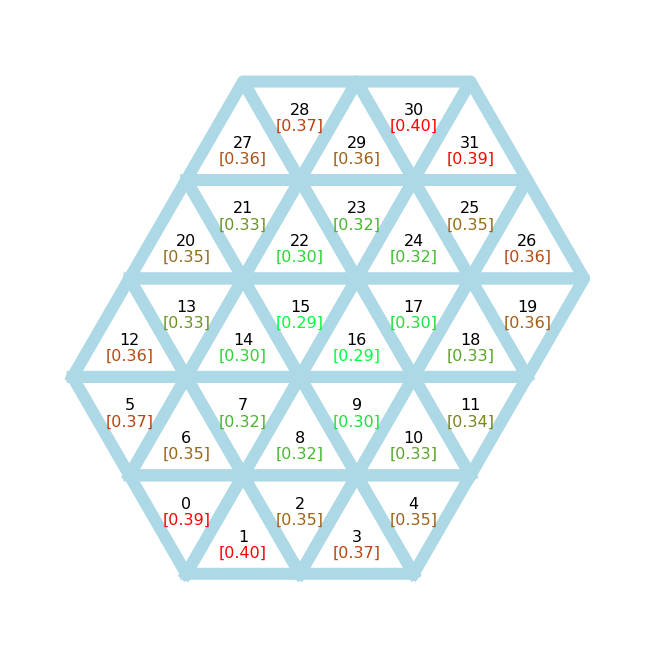

In [8]:
plot_undeployed_2D(input_data,
                   curr_um,
                   show_height=True,
                   show_plot=True)

In [9]:
connectivity = np.array(input_data['umbrella_connectivity'])
pos = get_center_position(curr_um)[:,:2]

In [10]:
graph = dp.create_graph(connectivity, curr_um)

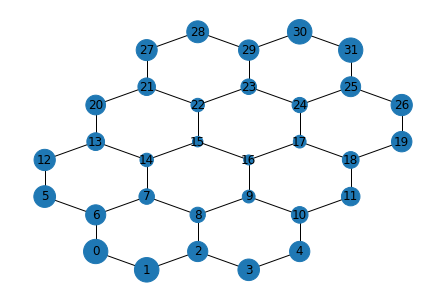

In [11]:
dp.draw_height(graph, pos)

In [12]:
bumps, depressions = dp.find_extrems(graph, drop_boudary=True)

In [13]:
print('\nHere are the bumps and depressions allong with their corresponding heights:')
print('\n--> bumps:')
print(*[(b, graph.nodes[b]['height']) for b in bumps], sep='\n')
print('\n--> depression:')
print(*[(d, graph.nodes[d]['height']) for d in depressions], sep='\n')


Here are the bumps and depressions allong with their corresponding heights:

--> bumps:


--> depression:
(16, 0.2869929172081087)


In [14]:
paths = dp.shortes_paths(graph, bumps, depressions); paths

[]

In [15]:
# light_grey = 211/255
# colors_default = [(light_grey,light_grey,light_grey)] * len(graph) # light_grey

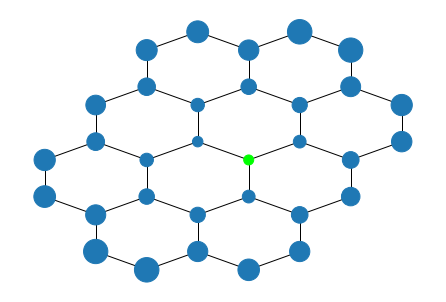

In [16]:
# draw extrem points (bumps are red and depression are green)
dp.draw_height_extrems(graph, pos, bumps, depressions)

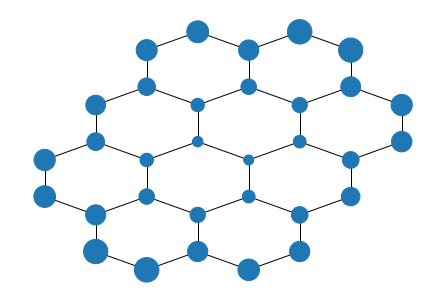

In [17]:
dp.draw_height_path(graph, pos, paths)

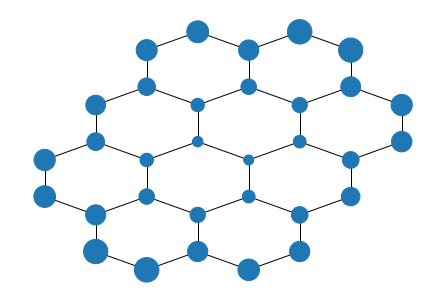

In [18]:
dp.draw_height_surrounds(graph, pos, dp.surround_bumps(graph, bumps))